# Desafío de Ingeniería de Datos — Análisis de Tweets

## 1. Preparación del entorno y contexto

En esta sección, nos aseguramos de tener los archivos necesarios, descargamos los datos de Drive si es necesario, los convertimos a parquet para un mejor uso con DuckDB y respondemos preguntas.

### Contexto y enfoque para resolver el desafío

Este notebook documenta todo el proceso de solución del desafío de análisis de tweets. Abarca desde la obtención de datos hasta la optimización del procesamiento y la evaluación del rendimiento en tiempo y memoria.

Recibimos un archivo JSON con tweets relacionados con las protestas agrícolas en India. El objetivo era responder a tres preguntas específicas relacionadas con fechas, emojis y usuarios mencionados. Busqué una solución que fuera:

- Eficiente en tiempo y memoria.

- Fácil de mantener y reproducir.

- Basada en herramientas modernas y adecuadas para análisis de datos.

### Decisiones técnicas y bibliotecas utilizadas

- **DuckDB:** Consultas analíticas SQL directamente sobre archivos Parquet y JSON. Elegí DuckDB como motor de consultas SQL embebido en Python por varias razones:
  - Permite ejecutar consultas SQL directamente sobre archivos Parquet y JSON sin necesidad de cargas complejas.
  - Es muy eficiente para análisis de datos en columnas (columnar), lo que mejora el rendimiento al trabajar con grandes volúmenes de datos.
  - Proporciona un lenguaje declarativo (SQL) para consultas complejas, facilitando la extracción y agregación de información.
  - Comparado con leer archivos directamente con pandas, DuckDB es más rápido y consume menos memoria cuando se manejan grandes datasets.
  - Evita la necesidad de construir procesos ETL o pipelines externos, manteniendo todo en un solo entorno de código.
  - Mayor facilidad de toda la equipa en usar SQL para extraer informaciones.

- **gdown:** Para descargar archivos desde Google Drive de forma automatizada y reproducible.

- **emoji:** Para manusear emojis en contenido de cada tweet y extraer los más utilizados.

- **memory_profiler:** Medición precisa del uso de memoria por función.

- **time / cProfile:** Medición de tiempo de ejecución.

### Razonamiento general del enfoque

1. **Preparación de datos:** 
   - El dataset original está en formato JSON, con tweets almacenados línea a línea.
   - Para consultas eficientes, convertimos este JSON a Parquet, un formato columnar optimizado para consultas analíticas, utilizando DuckDB por mejor performance y facilidad.

2. **Consultas analíticas:**
   - Utilizo SQL para filtrar, agrupar y ordenar los datos, logrando respuestas rápidas y claras a las preguntas.
   - Uso expresiones regulares para extraer emojis y menciones dentro del texto de los tweets.
   - Extraigo solo los datos relevantes para cada pregunta, mejorando el rendimiento.

3. **Ventajas de esta solución:**
   - Código limpio y mantenible.
   - Uso de tecnologías que permiten escalabilidad a datasets más grandes.
   - Facilidad para modificar y extender consultas futuras.

---


## 2. Ejecución dos scripts de preparación

Descarga del archivo JSON: Primero hacemos el download de lo arquivo json, salvo en un drive, usando a lib gdown. Esta funcion armazenará el arquivo json en la pasta data/. Caso el arquivo ya estea en la pasta, el script nos avisará e pulará el processo de download de lo arquivo.

Antes de todo, tenemos que instalar las dependecias:

In [ ]:
%pip install -r ../requirements.txt

In [1]:
from download_data import download_file_from_google_drive

In [2]:
download_file_from_google_drive()

✅ File already exists. Skipping download.
Elapsed: 0.0032 seconds


Conversión de JSON a Parquet: Esta función usa DuckDB para leer el archivo JSON línea por línea (read_json_auto) y escribirlo como Parquet (COPY TO ... (FORMAT PARQUET)), lo cual mejora significativamente el rendimiento de las consultas.

In [3]:
from convert_to_parquet import convert_json_to_parquet

In [4]:
convert_json_to_parquet()

✅ Parquet file already exists.
Elapsed: 0.0016 seconds


## 3. Respuestas a las preguntas (tiempo de ejecución)

Agora tenemos el arquivo .parquet para hacer consultas optimizadas con duckdb, entoncens podemos responder las preguntas

3.1. Las top 10 fechas donde hay más tweets. Mencionar el usuario (username) que más publicaciones tiene por cada uno de esos días. Debe incluir las siguientes funciones:

In [5]:
import q1_time as q1

In [6]:
q1.execute()

[(datetime.date(2021, 2, 19), 'Preetm91'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 20), 'MangalJ23056160')]
Elapsed: 0.1369 seconds


- Usamos DuckDB para extraer la fecha (date) a partir del campo date del tweet, agrupamos por fecha contando la cantidad de tweets para cada fecha.

- Agrupamos por fecha y por username, contando la cantidad de tweets.

- Luego, para cada fecha, usamos una subconsulta para seleccionar el usuario con más publicaciones.

- Se devuelve el top 10 de fechas con más tweets y su usuario más activo.

3.2. Los top 10 emojis más usados con su respectivo conteo. Debe incluir las siguientes funciones:

In [7]:
import q2_time as q2

In [8]:
q2.execute()

[('🙏', 7286), ('😂', 3072), ('🚜', 2972), ('✊', 2411), ('🌾', 2363), ('🏻', 2080), ('❤', 1779), ('🤣', 1668), ('🏽', 1218), ('👇', 1108)]
Elapsed: 1.4969 seconds


- Extraemos solo la columna content usando DuckDB.

- Iteramos sobre cada tweet no nulo y usamos la biblioteca emoji para detectar y extraer todos los emojis.

- Guardamos todos los emojis en una lista y usamos collections.Counter para contar las ocurrencias.

- Devolvemos los 10 emojis más frecuentes con su respectivo conteo.

⚠️ Esta función fue optimizada para ignorar caracteres comunes y sólo contar emojis válidos según el estándar Unicode Emoji.

3.3. El top 10 histórico de usuarios (username) más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos.

In [9]:
import q3_time as q3

In [10]:
q3.execute()

[('narendramodi', 2261), ('Kisanektamorcha', 1836), ('RakeshTikaitBKU', 1641), ('PMOIndia', 1422), ('RahulGandhi', 1125), ('GretaThunberg', 1046), ('RaviSinghKA', 1015), ('rihanna', 972), ('UNHumanRights', 962), ('meenaharris', 925)]
Elapsed: 0.1868 seconds


- Extraemos la columna content con DuckDB.

- Usamos expresiones regulares para detectar menciones del tipo @usuario.

- Para cada tweet, recolectamos las menciones y las agregamos.

- Contamos las ocurrencias de cada usuario mencionado y devolvemos el top 10.

## 4. Medición de memoria utilizada

In [1]:
import q1_memory as q1_m
import q2_memory as q2_m
import q3_memory as q3_m

In [2]:
%load_ext memory_profiler
%memit q1_m.execute()



Filename: c:\Users\ebraim\Documents\personal\challenge_DE\src\q1_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     7     76.6 MiB     76.6 MiB           1   @profile
     8                                         def q1_time(file_path: str) -> List[Tuple[datetime.date, str]]:
     9                                         
    10     76.6 MiB      0.0 MiB           1       CURRENT_FOLDER = Path(__file__).resolve()
    11     76.6 MiB      0.0 MiB           1       PROJECT_ROOT = CURRENT_FOLDER.parent.parent
    12                                         
    13     85.0 MiB      8.4 MiB           1       con = duckdb.connect(database=':memory:')
    14                                         
    15     90.7 MiB      5.7 MiB           2       con.execute(f"""
    16                                                 CREATE TABLE tweets AS 
    17                                                 SELECT 
    18                                                     C

In [3]:
%load_ext memory_profiler
%memit q2_m.execute()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: c:\Users\ebraim\Documents\personal\challenge_DE\src\q2_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    11     88.5 MiB     88.5 MiB           1   @profile
    12                                         def q2_time(file_path: str) -> List[Tuple[str, int]]:
    13                                         
    14     88.5 MiB      0.0 MiB           1       CURRENT_FOLDER = Path(__file__).resolve()
    15     88.5 MiB      0.0 MiB           1       PROJECT_ROOT = CURRENT_FOLDER.parent.parent
    16                                         
    17    180.1 MiB     91.5 MiB           1       df = duckdb.query(f"SELECT content FROM read_parquet('{PROJECT_ROOT}/{file_path}')").to_df()
    18                                         
    19    180.1 MiB      0.0 MiB           1       all_emojis = []
    20                                         
    21    185.0 

In [4]:
%load_ext memory_profiler
%memit q3_m.execute()

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: c:\Users\ebraim\Documents\personal\challenge_DE\src\q3_memory.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6    171.7 MiB    171.7 MiB           1   @profile
     7                                         def q3_time(file_path):
     8                                         
     9    171.7 MiB      0.0 MiB           1       CURRENT_FOLDER = Path(__file__).resolve()
    10    171.7 MiB      0.0 MiB           1       PROJECT_ROOT = CURRENT_FOLDER.parent.parent
    11                                             
    12    171.7 MiB      0.0 MiB           2       query = f"""
    13                                                 WITH mentions_extracted AS (
    14                                                     SELECT REGEXP_EXTRACT_ALL(content, '@\\w+') AS mentions
    15    171.7 MiB      0.0 MiB           1               FROM read_parquet('{PROJECT

## 4. Conclusiones

- DuckDB demostró ser una herramienta poderosa para análisis columnar rápido y eficiente.

- El uso de archivos Parquet permitió gran ahorro de memoria y una performance surpreendente para tiempo de ejecución.

- Las expresiones regulares y bibliotecas especializadas como emoji facilitaron el procesamiento textual.

- Separar las funciones por pregunta mejoró la claridad y mantenibilidad del código.

- Todas las funciones fueron evaluadas en tiempo y memoria, permitiendo detectar cuellos de botella y optimizar donde fue necesario.

## 5. Mejoras futuras y evolución

#### Organización y Estructura del Proyecto

- Reorganizar el proyecto con una estructura estándar de Python:

```
tweet_data/
├── data/                         # Carpeta para almacenar archivos de datos (JSON, Parquet, etc.)
├── notebooks/                    # Notebooks Jupyter (.ipynb) con el desarrollo y análisis
├── src/                          # Código fuente del proyecto
│   ├── __init__.py               # Archivo para declarar el paquete Python
│   ├── download_data.py          # Script para descargar el dataset desde Google Drive
│   ├── convert_to_parquet.py     # Script para convertir el archivo JSON a formato Parquet
│   ├── q1.py                     # Lógica para responder a la Pregunta 1 (top fechas y usuarios)
│   ├── q2.py                     # Lógica para responder a la Pregunta 2 (top emojis)
│   └── q3.py                     # Lógica para responder a la Pregunta 3 (usuarios más mencionados)
├── tests/                        # Carpeta para pruebas unitarias utilizando pytest
├── requirements.txt              # Archivo con las dependencias necesarias del proyecto
├── README.md                     # Documentación principal del proyecto
└── setup.py                      # Archivo para convertir el proyecto en un paquete instalable
```



#### Calidad del Código

- Incluir docstrings descriptivas en cada función (entradas, salidas, descripción)
- Escribir tests unitarios con pytest para cada función clave (download, convert, q1, q2, q3)
- Utilizar mocks para evitar depender de archivos reales en los tests

#### Observabilidad

- Automatizar análisis de performance con cProfile o line_profiler
- Generar reportes simples con métricas de uso de CPU y memoria

#### Empaquetado y Reproducibilidad

- Crear un Makefile o script con los comandos
- Centralizar la ejecución en un main.py para ejecutar toda la lógica paso a paso
- Automatizar el flujo con herramientas como Prefect, Airflow o Dagster


Desafio enviado:

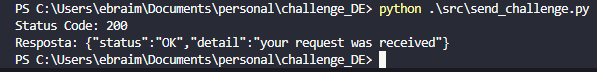